In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def load_data(n = 2, dts = "training"):
    if dts != "training" and dts != "validation":
        return
    if dts == "training" and (n<2 or n>7):
        return
    if dts == "validation" and (n<2 or n>5):
        return
    df = pd.read_csv("visualization_data/"+dts+"_rouge_"+str(n)+"sum.csv", index_col=0, header=[0,1])
    return df

In [3]:
df2 = pd.DataFrame(load_data(7).mean())
df2

0
R1-F1    1-2  0.299820
         1-3  0.312236
         1-4  0.288123
         1-5  0.288524
         1-6  0.310375
...                ...
RLsum-F1 4-6  0.183276
         4-7  0.157021
         5-6  0.161652
         5-7  0.166731
         6-7  0.160112

[84 rows x 1 columns]

In [4]:
df2.reset_index(inplace=True)
df2.groupby("level_0").mean()

/var/folders/zw/q5kx3f693rgfk0h2y_jgmhnm0000gn/T/ipykernel_24447/3892092703.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("level_0").mean()


,0
level_0,
R1-F1,0.304362
R2-F1,0.059092
RL-F1,0.174314
RLsum-F1,0.174314


In [23]:
df_trian = load_data(2, "training")
df_trian.head()

,R1-F1,R2-F1,RL-F1,RLsum-F1
,1-2,1-2,1-2,1-2
paper_id,,,,
SP:0007ee9ce7dfaf12a7dff4aa2979403aed9397d7,0.331429,0.057803,0.182857,0.182857
SP:001a31f7a439ab22943dedb4fa4d46e3dd56e603,0.424870,0.125654,0.248705,0.248705
SP:001e57e71bafdb52d6511bdd6aa73b78d60248f2,0.348387,0.090909,0.200000,0.200000
SP:004f41dfc870c5a9b347d118d7e41d7c3db77b91,0.326797,0.105960,0.235294,0.235294
SP:00578dd55a640c10dbf22f647b736e49f6ee3c32,0.280000,0.050505,0.140000,0.140000


In [24]:
df_val = load_data(2, "validation")
df_val.head()

,R1-F1,R2-F1,RL-F1,RLsum-F1
,1-2,1-2,1-2,1-2
paper_id,,,,
SP:017b66d6262427cca551ef50006784498ffc741d,0.283186,0.017857,0.141593,0.141593
SP:034c3bc2b2fe4991f56f168ea7b4b552c500b9ad,0.358566,0.112450,0.167331,0.167331
SP:0355b54430b39b52df94014d78289dd6e1e81795,0.315068,0.125000,0.219178,0.219178
SP:0561a2174d7334e078a49ae8859a36e4d74f9b5b,0.474820,0.189781,0.302158,0.302158
SP:0841febf2e95da495b41e12ded491ba5e9633538,0.284024,0.071856,0.201183,0.201183


In [34]:
df_trian['R1-F1']['1-2'].values

array([0.33142857, 0.42487047, 0.3483871 , ..., 0.28368794, 0.32142857,
       0.27672956])

In [43]:
df_R1_train = pd.DataFrame(df_trian['R1-F1']['1-2'].values, columns=["Training"])
df_R1_val = pd.DataFrame(df_val['R1-F1']['1-2'].values, columns=["Validation"])

Text(0.5, 1.0, '2 summaries')

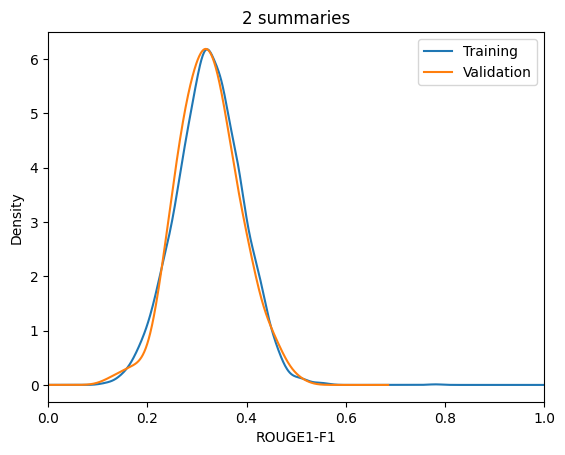

In [69]:
fig, ax = plt.subplots()
df_R1_train['Training'].plot(kind='density', ax=ax, xlim=[0,1], legend=True)
df_R1_val['Validation'].plot(kind='density', ax=ax, xlim=[0,1], legend=True)
ax.set_xlabel("ROUGE1-F1")
ax.set_title("2 summaries")

In [97]:
def get_dens(n=2, score='R1', rep="mean", save=True):
    df_trian = load_data(n, "training")
    df_val = load_data(n, "validation")
    train_value = df_trian[score+'-F1'].values
    val_value = df_val[score+'-F1'].values
    if n==2:
        pass
    elif rep=="mean":
        print(train_value.shape)
        train_value = train_value.mean(axis=1)
        val_value = val_value.mean(axis=1)
    elif rep=="max":
        train_value = train_value.max(axis=1)
        val_value = val_value.max(axis=1)
    elif rep=="min":
        train_value = train_value.min(axis=1)
        val_value = val_value.min(axis=1)
    else:
        print("rep not correct")
        return
    df_R1_train = pd.DataFrame(train_value, columns=["Training"])
    df_R1_val = pd.DataFrame(val_value, columns=["Validation"])
    fig, ax = plt.subplots()
    df_R1_train['Training'].plot(kind='density', ax=ax, xlim=[0,1], legend=True)
    df_R1_val['Validation'].plot(kind='density', ax=ax, xlim=[0,1], legend=True)
    ax.set_xlabel(score+"-F1")
    if n==2:
        title = str(n) + " summaries"
    else:
        title = str(n) + " summaries (" + rep + ")"
    ax.set_title(title)
    if save:
        path = f"visualization_data/Rouge-bet-sum-graph/{score}_{n}sum_{rep}.png"
        plt.savefig(path)
    # plt.show()
    

(10, 10)


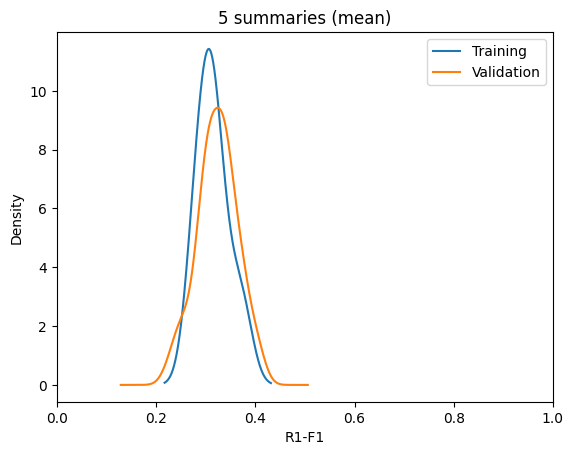

In [98]:
get_dens(5, rep="mean")

(2116, 3)
(1113, 6)
(10, 10)


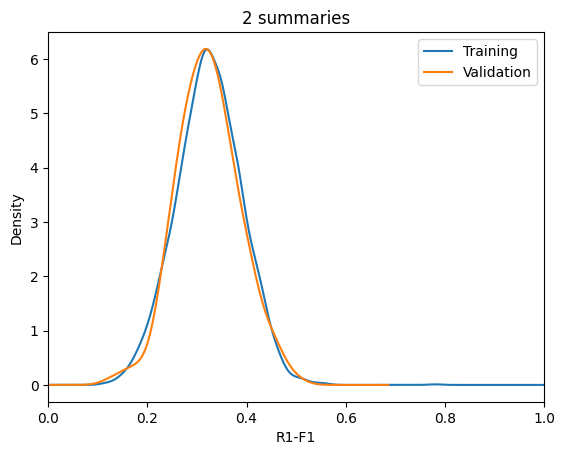

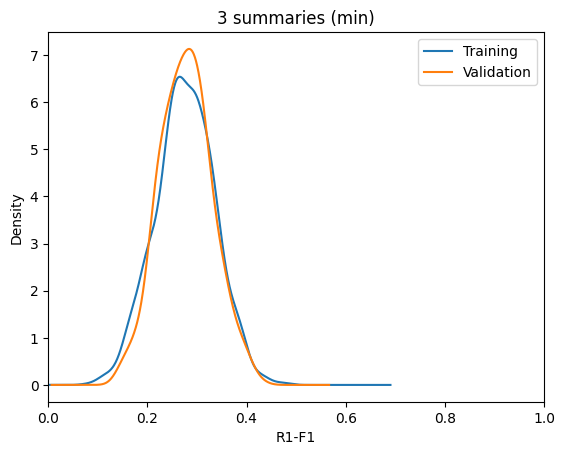

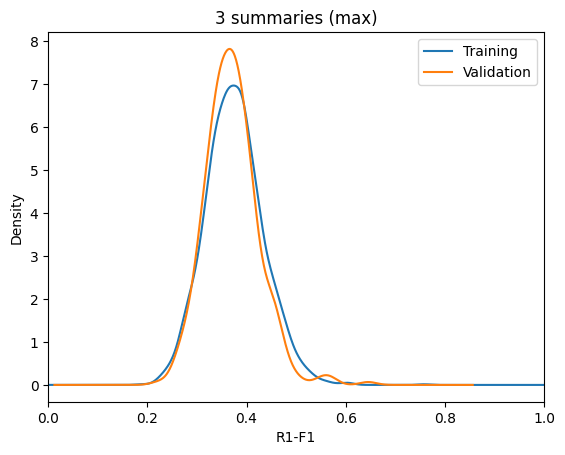

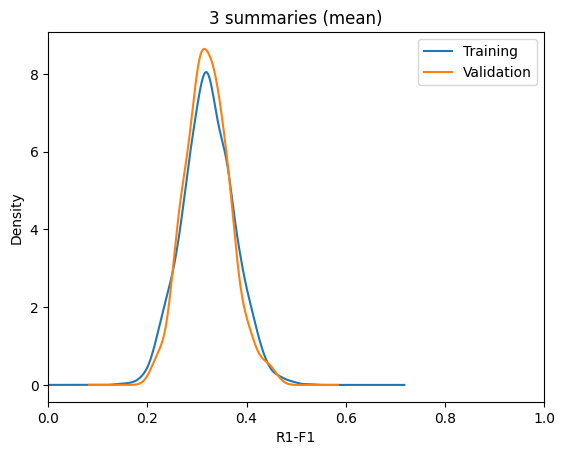

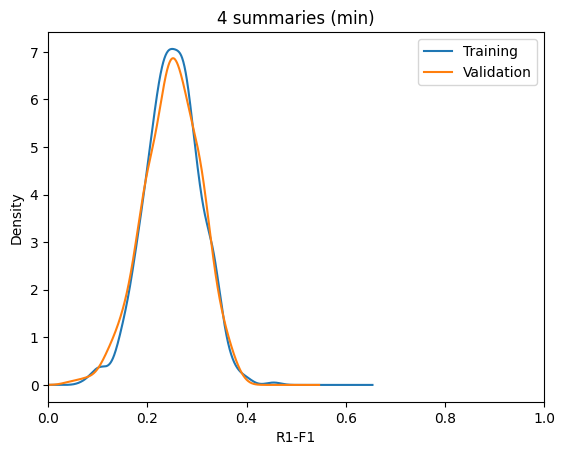

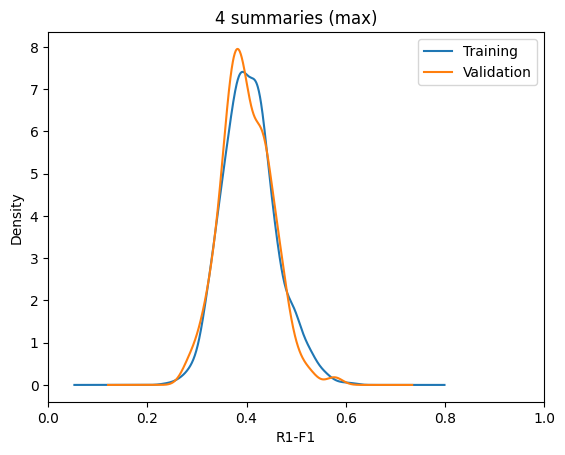

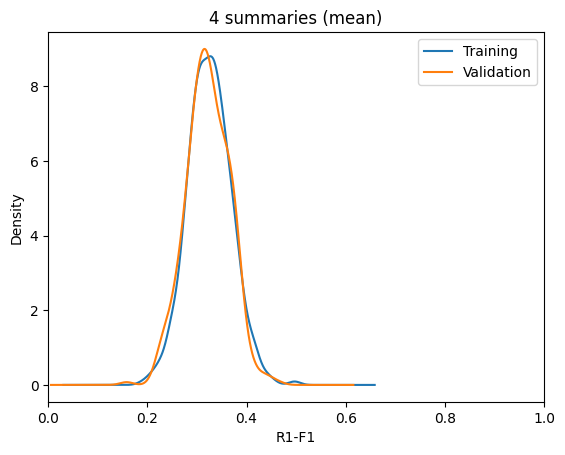

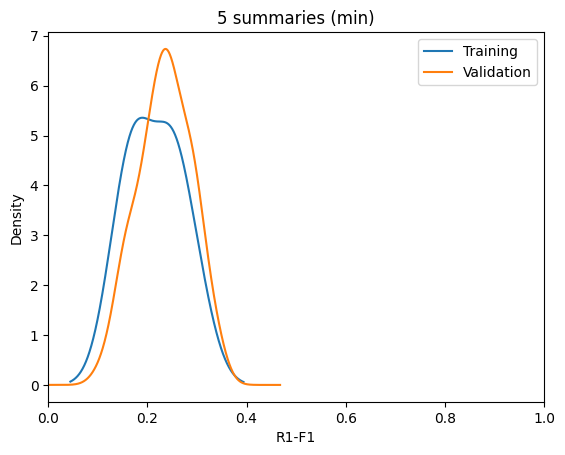

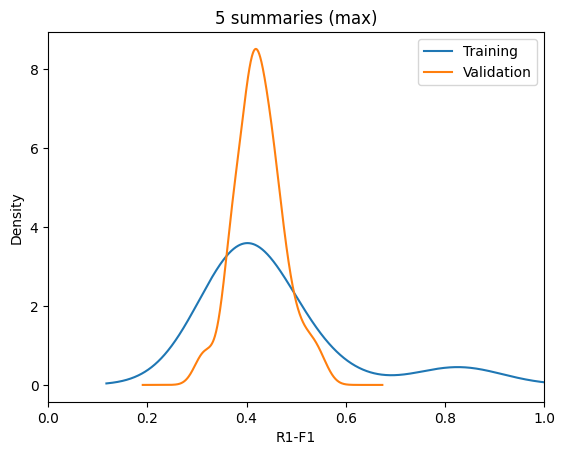

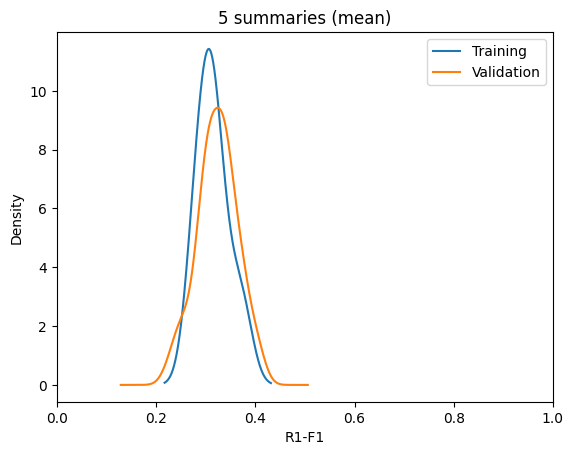

In [100]:
s = "R1"
get_dens(2)
for n in range(3,6):
    for r in ["min", "max", "mean"]:
        get_dens(n, score=s, rep=r)